In [97]:
## 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 모듈 import
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

## Model 1

In [98]:
# dir(keras.datasets)
# dir(keras.layers)
# dir(keras.losses)

In [99]:
## dataset 정리
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=.2)

In [100]:
print(X_train.shape)
print(y_train.shape)

(48000, 28, 28)
(48000,)


6

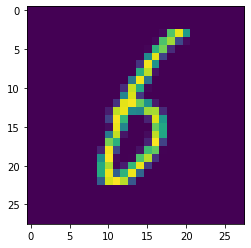

In [101]:
plt.imshow(X_train[0])
y_train[0]

In [102]:
X_train.shape

(48000, 28, 28)

In [103]:
# reshape를 하더라도 데이터 변화는 없다.
x = X_train.reshape(-1,784*1000)

In [104]:
y = x.reshape(48000,28,28)

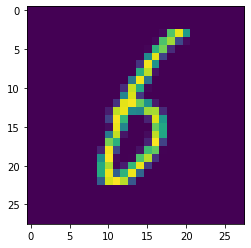

In [105]:
plt.imshow(y[0])

In [106]:
# X 데이터 정리
X_train = X_train.reshape(-1,784)
X_val = X_val.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [107]:
# y 데이터 확인 및 정리
np.unique(y_train)
np.unique(y_train).size
# categorical 데이터 확인
# one-hot 변환
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [108]:
# np.unique(y_train, return_counts=True)

In [109]:
## 모델 생성
model1 = Sequential()
model1.add(Dense(1024,activation="relu",input_dim=784))
model1.add(Dense(512,activation="sigmoid"))
model1.add(Dense(10,activation="softmax"))

In [110]:
model1.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1024)              803840    
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [111]:
## 모델 설정
optimizer = "sgd"
loss = "categorical_crossentropy"
metrics = ["accuracy"]
model1.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

In [112]:
## 모델 학습
model1.fit(
    X_train,
    y_train,
    epochs = 10,
    # batch_size=32,
    validation_data = (X_val,y_val)
)
# batch_size = 32 -> 48000/32 = 1500

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4079 - accuracy: 0.8910 - val_loss: 0.2563 - val_accuracy: 0.9266
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2041 - accuracy: 0.9429 - val_loss: 0.1891 - val_accuracy: 0.9448
Epoch 3/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1525 - accuracy: 0.9567 - val_loss: 0.1568 - val_accuracy: 0.9518
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1189 - accuracy: 0.9662 - val_loss: 0.1387 - val_accuracy: 0.9583
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0964 - accuracy: 0.9731 - val_loss: 0.1162 - val_accuracy: 0.9646
Epoch 6/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0787 - accuracy: 0.9778 - val_loss: 0.1089 - val_accuracy: 0.9683
Epoch 7/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0658 - accuracy: 0.9814 - val_loss: 0.1008 - val_

In [113]:
## test 정확도 검증
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0794 - accuracy: 0.9757


[0.07935802638530731, 0.9757000207901001]

In [114]:
# np.sum((np.argmax(model1.predict(X_test),axis=1) == np.argmax(y_test,axis=1))/y_test.size)

In [115]:
np.sum(np.argmax(y_test,axis=1) == np.argmax(model1.predict(X_test),axis=1))/len(y_test)

313/313 [==============================] - 1s 4ms/step


0.9757

In [116]:
## 활용
def mnist_test(x):
    ind = np.random.choice(np.arange(len(X_test)),x, replace=False)
    size = x
    score = 0
    for i in ind:
        plt.imshow(X_test[i].reshape(28,28))
        pred = np.argmax(model1.predict(X_test[[i]]))
        real = np.argmax(y_test[i])
        if pred == real:
            result = "맞음"
            score += 1
        else:
            result = "틀림"
        score = (score/size)*100
        print(f"정답은 ===> {real}  예측은 ===> {pred}  결과는 ===> {result} ")
        plt.show()
    print("\n",f"총 {size}를 예측한 결과 예측률은{score} %")

1/1 [==============================] - 0s 24ms/step
정답은 ===> 0  예측은 ===> 0  결과는 ===> 맞음 


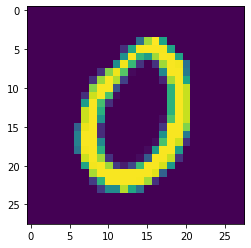

1/1 [==============================] - 0s 21ms/step
정답은 ===> 9  예측은 ===> 9  결과는 ===> 맞음 


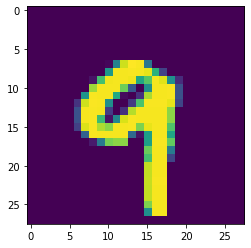

1/1 [==============================] - 0s 20ms/step
정답은 ===> 5  예측은 ===> 5  결과는 ===> 맞음 


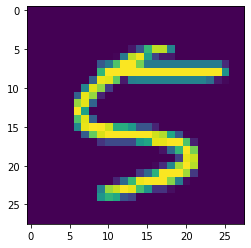

1/1 [==============================] - 0s 19ms/step
정답은 ===> 6  예측은 ===> 6  결과는 ===> 맞음 


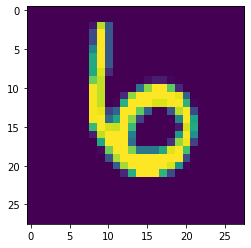

1/1 [==============================] - 0s 20ms/step
정답은 ===> 6  예측은 ===> 6  결과는 ===> 맞음 


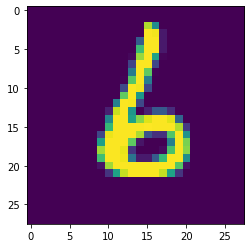

1/1 [==============================] - 0s 26ms/step
정답은 ===> 0  예측은 ===> 0  결과는 ===> 맞음 


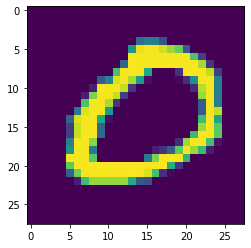

1/1 [==============================] - 0s 19ms/step
정답은 ===> 7  예측은 ===> 7  결과는 ===> 맞음 


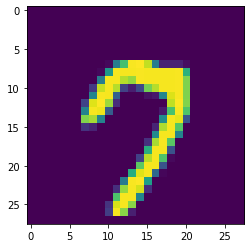

1/1 [==============================] - 0s 25ms/step
정답은 ===> 0  예측은 ===> 0  결과는 ===> 맞음 


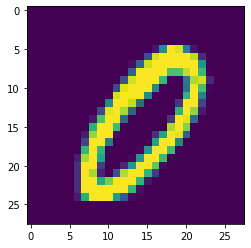

1/1 [==============================] - 0s 21ms/step
정답은 ===> 0  예측은 ===> 0  결과는 ===> 맞음 


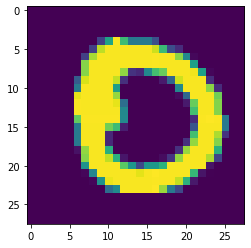

1/1 [==============================] - 0s 18ms/step
정답은 ===> 8  예측은 ===> 8  결과는 ===> 맞음 


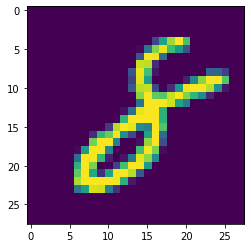


 총 10를 예측한 결과 예측률은11111111110.000002 %


In [117]:
mnist_test(10)

## Model 2

In [180]:
## dataset 정리
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [181]:
y_train_full = np.where((y_train_full == 1) | (y_train_full == 7) | (y_train_full == 9)
                        ,1,0)

In [182]:
y_test = np.where((y_test == 1) | (y_test == 7) | (y_test == 9)
                    ,1,0)

In [183]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=.2)

In [184]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 28, 28)
(12000, 28, 28)
(48000,)
(12000,)


In [185]:
X_train = X_train.reshape(-1,28*28)
X_val = X_val.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [186]:
np.unique(y_train)

array([0, 1])

In [187]:
model2 = Sequential()
model2.add(Dense(1024,activation="relu",input_shape=(784,)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(512,activation="sigmoid"))
model2.add(keras.layers.Dense(1,activation="sigmoid"))

In [188]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 1024)              803840    
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_39 (Dense)            (None, 512)               524800    
                                                                 
 dense_40 (Dense)            (None, 1)                 513       
                                                                 
Total params: 1,333,249
Trainable params: 1,331,201
Non-trainable params: 2,048
_________________________________________________________________


In [189]:
## 모델 설정
model2.compile(optimizer="sgd",
                loss="binary_crossentropy",
                metrics=["accuracy"])

# model2.compile(optimizer=keras.optimizers.SGD(),
#                 loss=keras.losses.BinaryCrossentropy(),
#                 metrics=["accuracy"])

In [190]:
X_val.shape

(12000, 784)

In [191]:
## 모델 학습
model2.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size=400,
    validation_data = (X_val,y_val),
    verbose=1
)

Epoch 1/10
120/120 [==============================] - 4s 29ms/step - loss: 0.3641 - accuracy: 0.8605 - val_loss: 0.2461 - val_accuracy: 0.9052
Epoch 2/10
120/120 [==============================] - 4s 31ms/step - loss: 0.2102 - accuracy: 0.9402 - val_loss: 0.1823 - val_accuracy: 0.9425
Epoch 3/10
120/120 [==============================] - 3s 29ms/step - loss: 0.1669 - accuracy: 0.9518 - val_loss: 0.1575 - val_accuracy: 0.9496
Epoch 4/10
120/120 [==============================] - 4s 29ms/step - loss: 0.1446 - accuracy: 0.9569 - val_loss: 0.1419 - val_accuracy: 0.9542
Epoch 5/10
120/120 [==============================] - 4s 30ms/step - loss: 0.1306 - accuracy: 0.9598 - val_loss: 0.1311 - val_accuracy: 0.9571
Epoch 6/10
120/120 [==============================] - 4s 30ms/step - loss: 0.1208 - accuracy: 0.9630 - val_loss: 0.1233 - val_accuracy: 0.9592
Epoch 7/10
120/120 [==============================] - 3s 29ms/step - loss: 0.1133 - accuracy: 0.9644 - val_loss: 0.1163 - val_accuracy: 0.9614

In [192]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1004 - accuracy: 0.9682


[0.10041294991970062, 0.9682000279426575]

In [193]:
def mnist_test1(x):
    ind = np.random.choice(np.arange(len(X_test)),x,replace=False)
    size = x
    score = 0
    for i in ind:
        plt.imshow(X_test[i].reshape(28,28))
        pred = np.where(model2.predict(X_test[[i]]) >0.5,1,0)
        real = np.where(y_test[i]>0.5,1,0)
        if pred == real:
            result = '맞음'
            score += 1
        else:
            result = '틀림'
        score = (score/size)*100
        print(f'정답은 ===> {real}  예측은 ===> {pred} 결과는 ===> {result}')
        plt.show()

In [194]:
model2.predict(X_test[0:1])

1/1 [==============================] - 0s 70ms/step


array([[0.9823178]], dtype=float32)

1/1 [==============================] - 0s 27ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


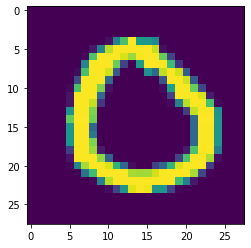

1/1 [==============================] - 0s 19ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


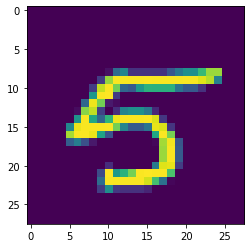

1/1 [==============================] - 0s 18ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


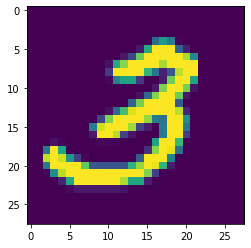

1/1 [==============================] - 0s 17ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


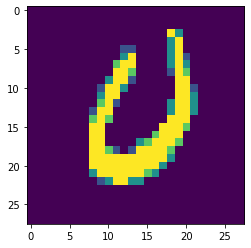

1/1 [==============================] - 0s 20ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


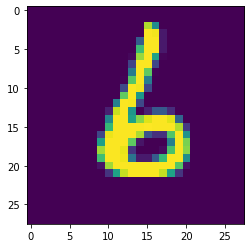

1/1 [==============================] - 0s 18ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


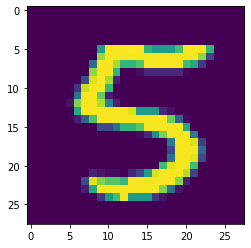

1/1 [==============================] - 0s 18ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


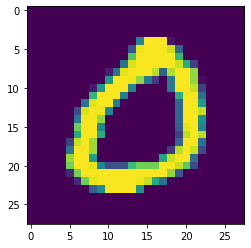

1/1 [==============================] - 0s 17ms/step
정답은 ===> 1  예측은 ===> [[0]] 결과는 ===> 틀림


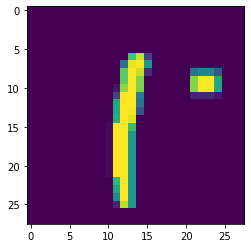

1/1 [==============================] - 0s 21ms/step
정답은 ===> 1  예측은 ===> [[1]] 결과는 ===> 맞음


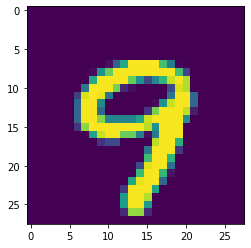

1/1 [==============================] - 0s 18ms/step
정답은 ===> 1  예측은 ===> [[1]] 결과는 ===> 맞음


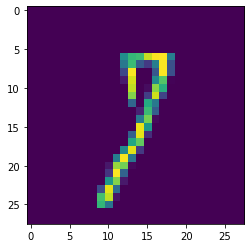

In [195]:
mnist_test1(10)